# Basic example of using ST-OPTICS 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from st_optics import ST_OPTICS

In [2]:
df = pd.read_csv('test-data.csv')
df.head()

,time,id,x,y
0,0,0,408.186946,165.914089
1,0,1,234.112701,101.730978
2,0,2,414.950016,92.300919
3,0,3,996.020857,588.633865
4,0,4,461.150924,86.666767


In [3]:
# normalize the data 
df['x'] = (df['x'] - df['x'].min()) / (df['x'].max() - df['x'].min())
df['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())
# transform to numpy array
data = df.loc[:, ['time','x','y']].values

In [10]:
st_optics = ST_OPTICS(xi = 0.4, eps2 = 10, min_samples = 5, n_jobs = 4) 
# for list of all parameter description see - src code comments
# to speed up the computation please see the parameters of sklearn.cluster.OPTICS and optimize eps and max_eps

In [11]:
st_optics.fit(data) 

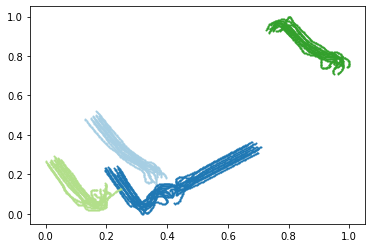

In [12]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

plot(data[:,1:], st_optics.labels) 

#### Memory Error
__If the datasets get to large the data has to be split into frames and merged again. For this use the `st_optics.fit_frame_split` with the parameters `frame_size` and `frame_overlap`__

In [7]:
st_optics = ST_OPTICS(xi = 0.4, eps2 = 10, min_samples = 5, n_jobs = 4)

In [8]:
st_optics.fit_frame_split(data, frame_size = 50)
# for list of all parameter description see - src code comments
# the fit frame split does not return the rechability, ordering, core_distances etc. Just the labels 

100%|██████████| 3/3 [00:18<00:00,  6.60s/it]


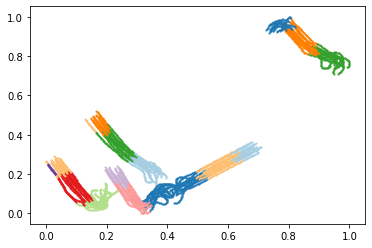

In [9]:
# the results of chunking and then clustering
plot(data[:,1:], st_optics.labels) 